# Seaborn Tutorial

## Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%reload_ext autoreload
%autoreload 2

## Import Data

In [3]:
print(sns.get_dataset_names())
crash_df = sns.load_dataset('car_crashes')
crash_df.head()

C:\Users\Wei\anaconda3\lib\site-packages\seaborn\utils.py:384: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 384 of the file C:\Users\Wei\anaconda3\lib\site-packages\seaborn\utils.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  gh_list = BeautifulSoup(http)


['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'tips', 'titanic']


total  speeding  alcohol  not_distracted  no_previous  ins_premium  \
0   18.8     7.332    5.640          18.048       15.040       784.55   
1   18.1     7.421    4.525          16.290       17.014      1053.48   
2   18.6     6.510    5.208          15.624       17.856       899.47   
3   22.4     4.032    5.824          21.056       21.280       827.34   
4   12.0     4.200    3.360          10.920       10.680       878.41   

   ins_losses abbrev  
0      145.08     AL  
1      133.93     AK  
2      110.35     AZ  
3      142.39     AR  
4      165.63     CA

## Distribution Plots

### Distribution Plot 直方图

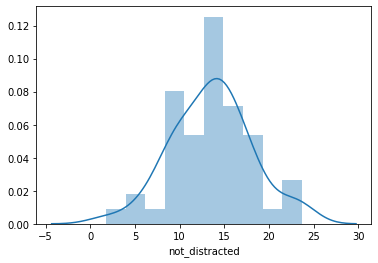

In [4]:
sns.distplot(crash_df['not_distracted'], kde=True, bins=10)

### Joint Plot 联合分布图

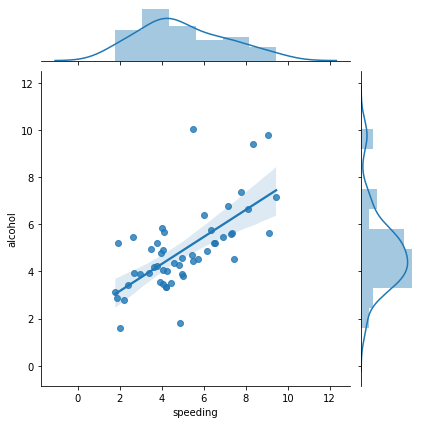

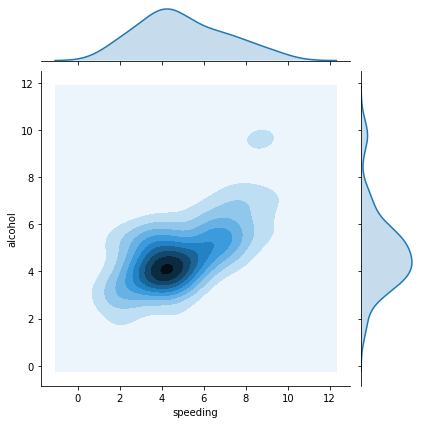

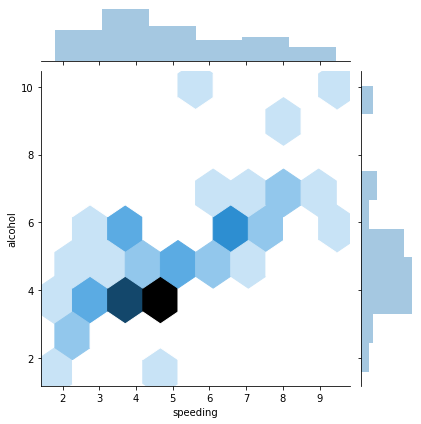

In [5]:
sns.jointplot(x='speeding', y='alcohol', data=crash_df, kind='reg')
sns.jointplot(x='speeding', y='alcohol', data=crash_df, kind='kde')
sns.jointplot(x='speeding', y='alcohol', data=crash_df, kind='hex')

### KDE Plot 核密度估计

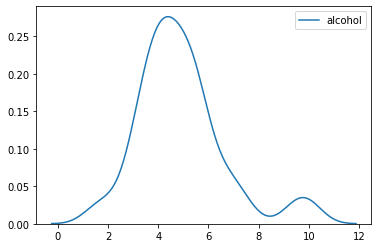

In [6]:
sns.kdeplot(crash_df['alcohol'])

### Pair PLots 变量两两之间的关系

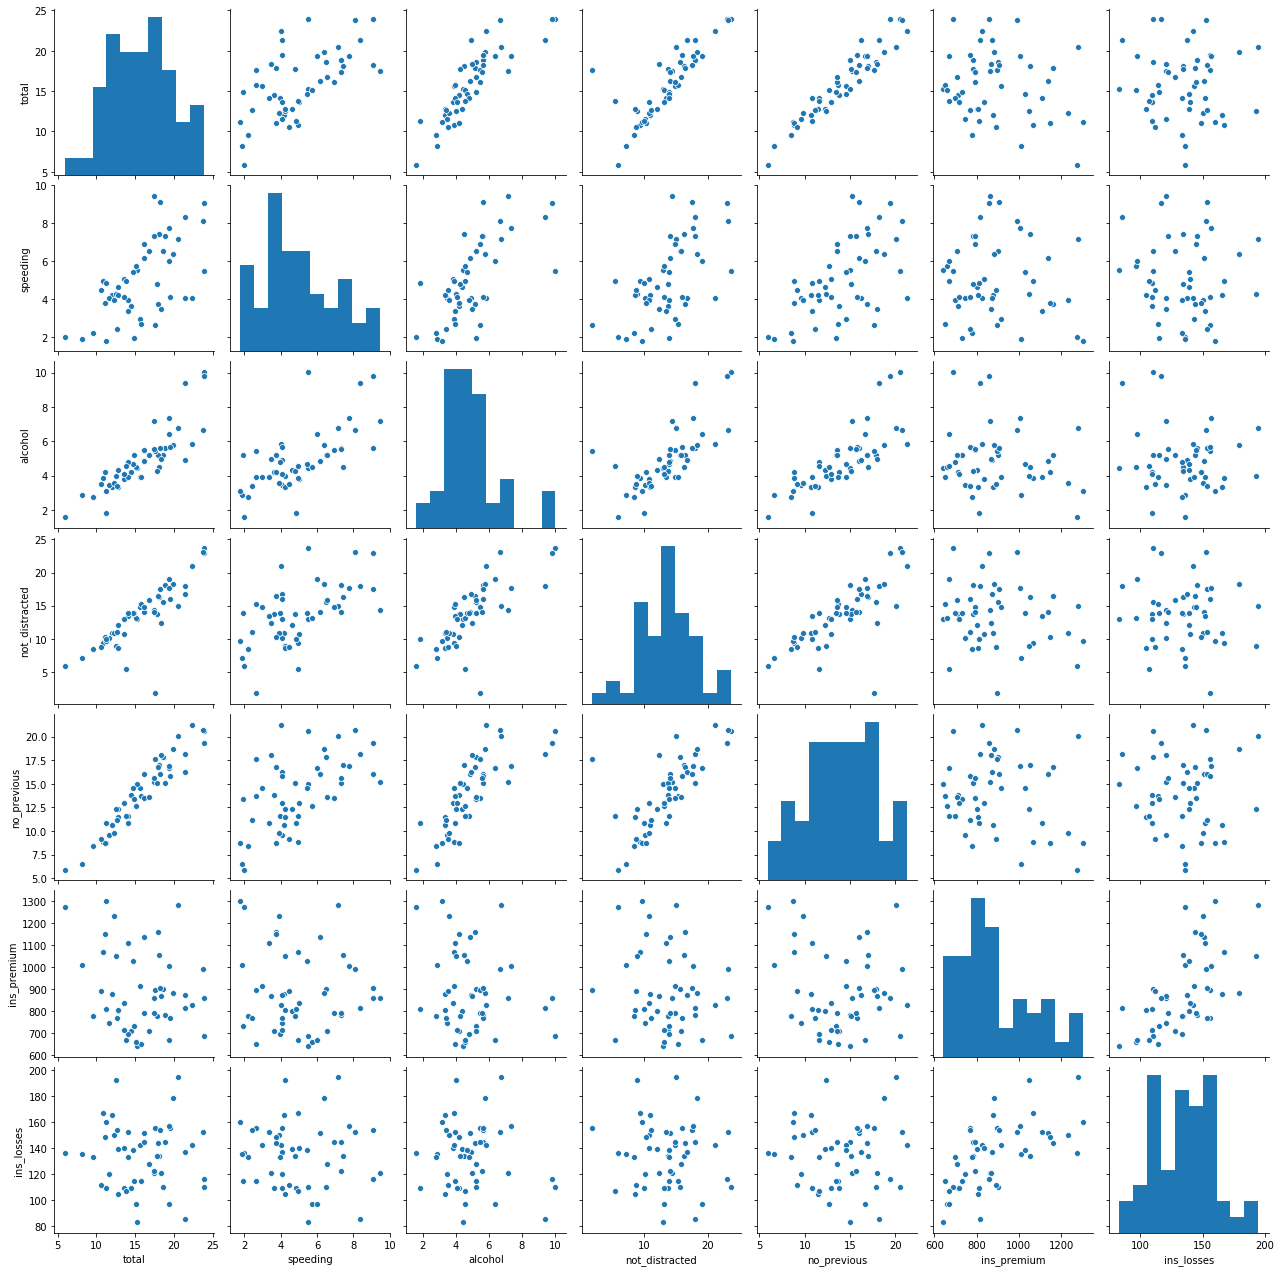

In [7]:
sns.pairplot(crash_df)

In [9]:
tips_df = sns.load_dataset('tips')
tips_df

total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]

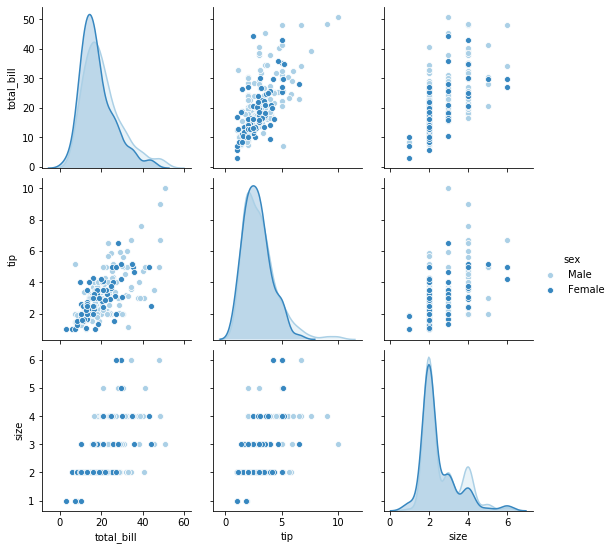

In [10]:
sns.pairplot(tips_df, hue='sex', palette='Blues')

### Rug Plot 一维数组中数据点实际的分布位置情况

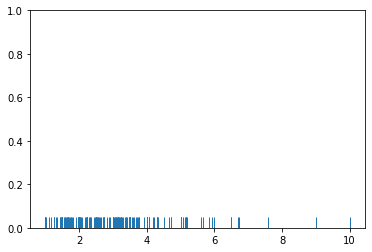

In [11]:
sns.rugplot(tips_df['tip'])

### Styling

<Figure size 576x288 with 0 Axes>

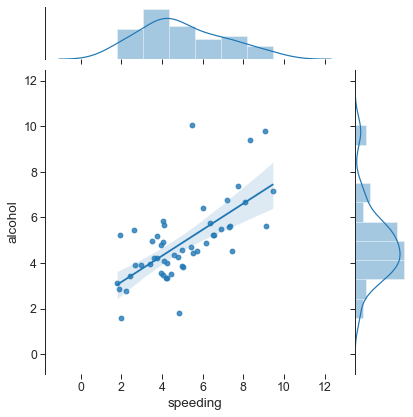

In [16]:
sns.set_style('ticks')

plt.figure(figsize=(8,4))

sns.set_context('paper', font_scale=1.4)

sns.jointplot(x='speeding', y='alcohol', data=crash_df, kind='reg')

sns.despine(left=False, bottom=True)

## Categorical Plots

### Bar Plots

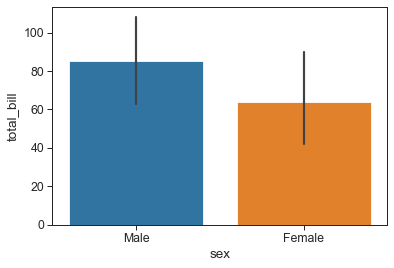

In [20]:
sns.barplot(x='sex', y='total_bill', data=tips_df, estimator=np.cov)

### Count Plot

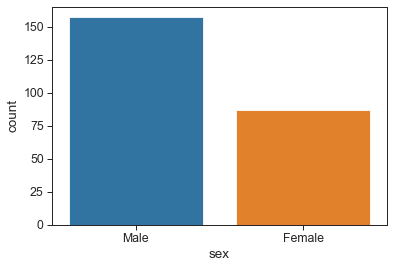

In [21]:
sns.countplot(x='sex', data=tips_df)

### Box Plot

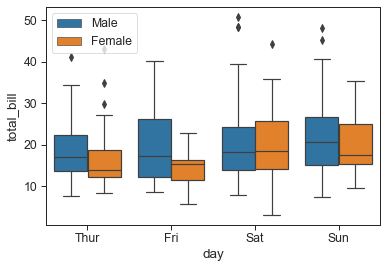

In [24]:
sns.boxplot(x='day', y='total_bill', data=tips_df, hue='sex')
plt.legend(loc=0)

### Violin Plot

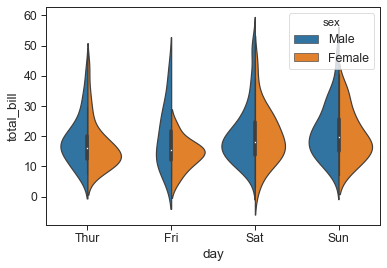

In [26]:
sns.violinplot(x='day', y='total_bill', data=tips_df, hue='sex', split=True)

### Strip Plot

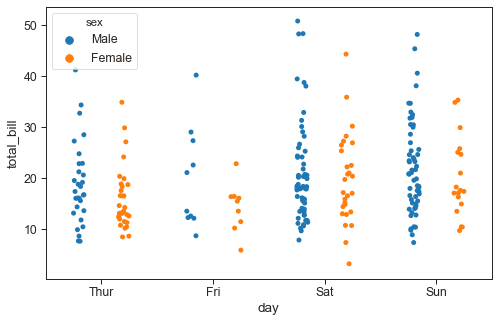

In [31]:
plt.figure(figsize=(8,5))

sns.stripplot(x='day', y='total_bill', data=tips_df, jitter=True, hue='sex', dodge=True)

### Swarm Plot

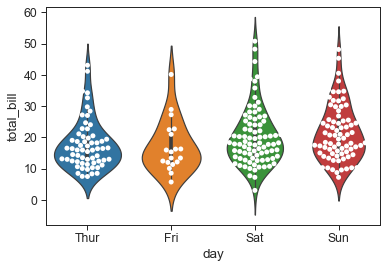

In [34]:
sns.violinplot(x='day', y='total_bill', data=tips_df)
sns.swarmplot(x='day', y='total_bill', data=tips_df, color='white')

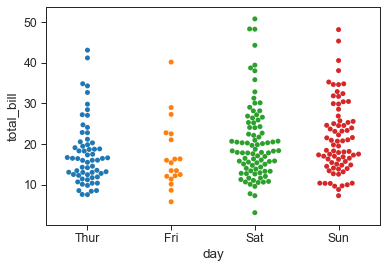

In [35]:
sns.swarmplot(x='day', y='total_bill', data=tips_df)

### Palettes

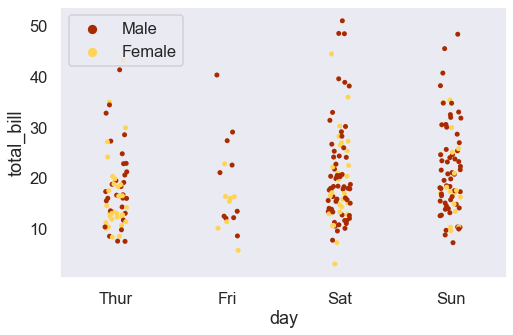

In [45]:
plt.figure(figsize=(8,5))
sns.set_style('dark')
sns.set_context('talk')
sns.stripplot(x='day', y='total_bill', data=tips_df, hue='sex', palette='afmhot')
plt.legend(loc=2)# 1,2,3,4代表四个角的位置。0表示best位置。一直到10。

## Matrix Plots

### Heatmaps

In [48]:
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)

crash_df
crash_mx = crash_df.corr() # 计算相关系数
crash_mx

total  speeding   alcohol  not_distracted  no_previous  \
total           1.000000  0.611548  0.852613        0.827560     0.956179   
speeding        0.611548  1.000000  0.669719        0.588010     0.571976   
alcohol         0.852613  0.669719  1.000000        0.732816     0.783520   
not_distracted  0.827560  0.588010  0.732816        1.000000     0.747307   
no_previous     0.956179  0.571976  0.783520        0.747307     1.000000   
ins_premium    -0.199702 -0.077675 -0.170612       -0.174856    -0.156895   
ins_losses     -0.036011 -0.065928 -0.112547       -0.075970    -0.006359   

                ins_premium  ins_losses  
total             -0.199702   -0.036011  
speeding          -0.077675   -0.065928  
alcohol           -0.170612   -0.112547  
not_distracted    -0.174856   -0.075970  
no_previous       -0.156895   -0.006359  
ins_premium        1.000000    0.623116  
ins_losses         0.623116    1.000000

<Figure size 576x432 with 0 Axes>

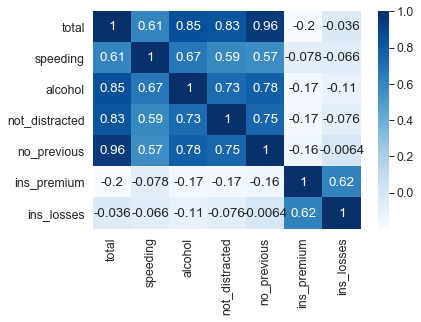

In [50]:
sns.heatmap(crash_mx, annot=True, cmap='Blues')

In [56]:
flights = sns.load_dataset('flights')
flights

year      month  passengers
0    1949    January         112
1    1949   February         118
2    1949      March         132
3    1949      April         129
4    1949        May         121
..    ...        ...         ...
139  1960     August         606
140  1960  September         508
141  1960    October         461
142  1960   November         390
143  1960   December         432

[144 rows x 3 columns]

In [57]:
flights = flights.pivot_table(index='month', columns='year', values='passengers') # 透视表
flights

year       1949  1950  1951  1952  1953  1954  1955  1956  1957  1958  1959  \
month                                                                         
January     112   115   145   171   196   204   242   284   315   340   360   
February    118   126   150   180   196   188   233   277   301   318   342   
March       132   141   178   193   236   235   267   317   356   362   406   
April       129   135   163   181   235   227   269   313   348   348   396   
May         121   125   172   183   229   234   270   318   355   363   420   
June        135   149   178   218   243   264   315   374   422   435   472   
July        148   170   199   230   264   302   364   413   465   491   548   
August      148   170   199   242   272   293   347   405   467   505   559   
September   136   158   184   209   237   259   312   355   404   404   463   
October     119   133   162   191   211   229   274   306   347   359   407   
November    104   114   146   172   180   203   237   271   305   310   362   
December    118   140   166   194   201   229   278   306   336   337   405   

year       1960  
month            
January     417  
February    391  
March       419  
April       461  
May         472  
June        535  
July        622  
August      606  
September   508  
October     461  
November    390  
December    432

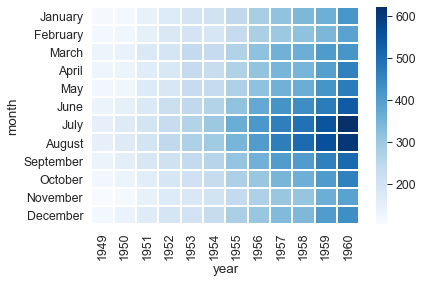

In [59]:
sns.heatmap(flights, cmap='Blues', linecolor='white', linewidth=1)

### Cluster Map

In [61]:
iris = sns.load_dataset('iris')
iris

sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]

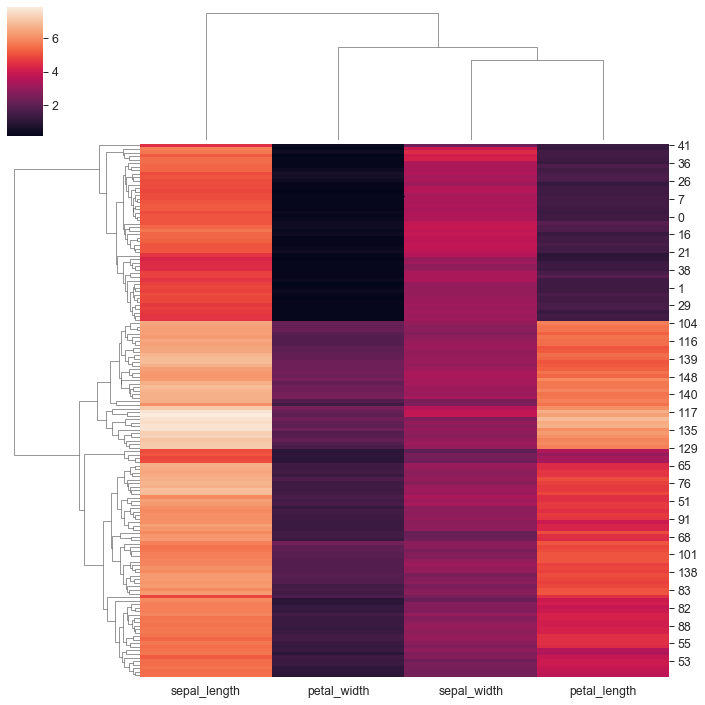

In [62]:
species = iris.pop('species')
sns.clustermap(iris)

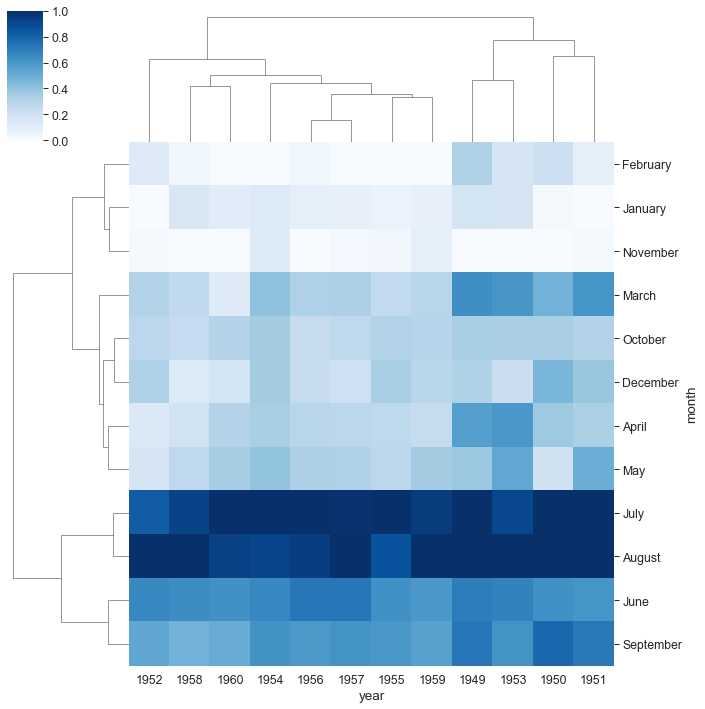

In [64]:
sns.clustermap(flights, cmap='Blues', standard_scale=1)

### PairGrid

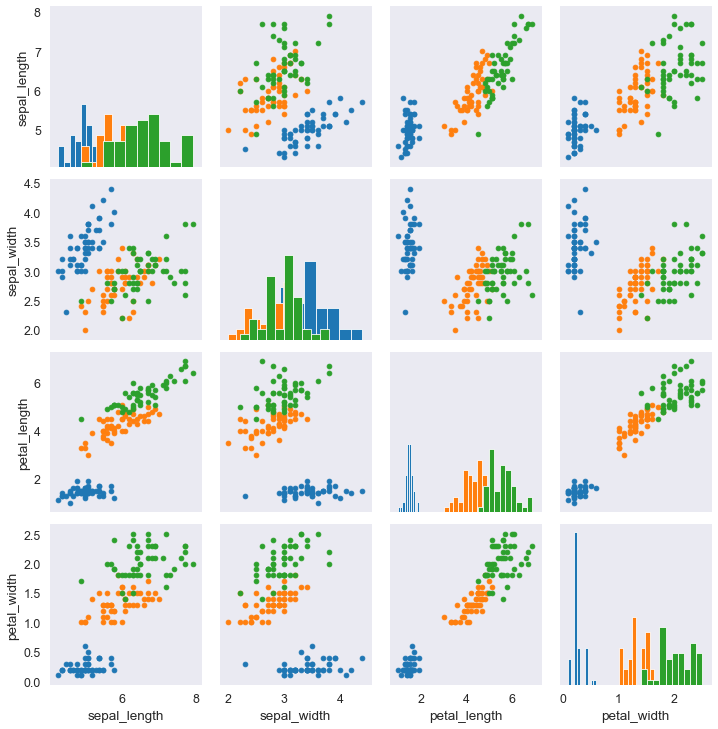

In [78]:
iris = sns.load_dataset('iris')
iris_g = sns.PairGrid(iris, hue='species')

# iris_g.map(plt.scatter)
iris_g.map_diag(plt.hist)
iris_g.map_offdiag(plt.scatter)

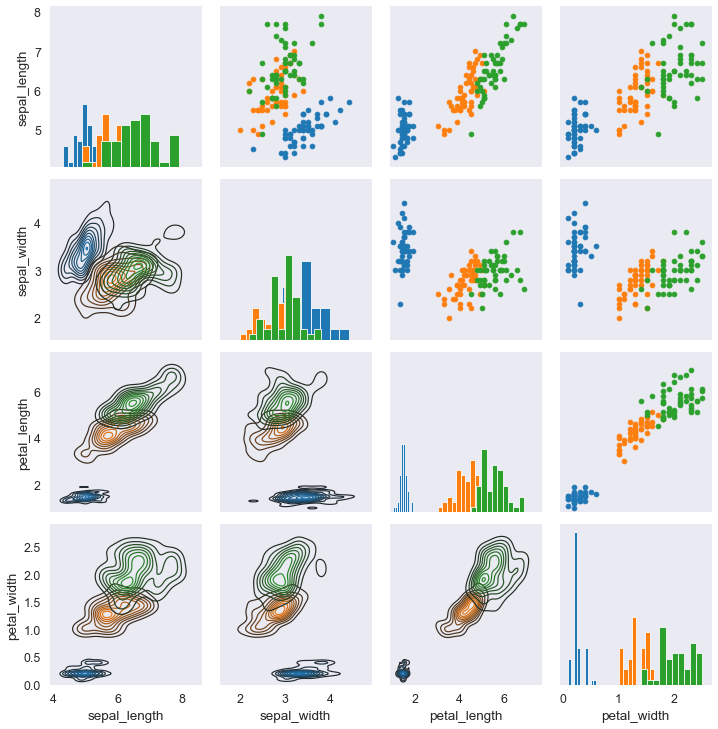

In [80]:
# iris = sns.load_dataset('iris')
iris_g = sns.PairGrid(iris, hue='species')

iris_g.map_diag(plt.hist)
iris_g.map_upper(plt.scatter)
iris_g.map_lower(sns.kdeplot)

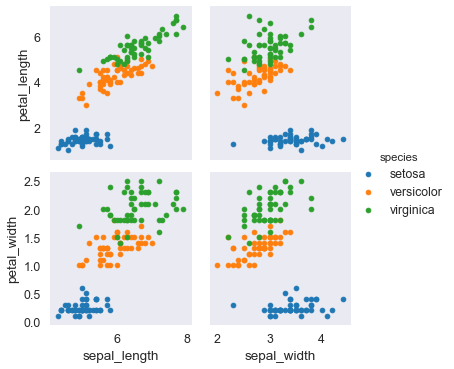

In [86]:
iris_g = sns.PairGrid(iris, hue="species",
                      x_vars=["sepal_length", "sepal_width"],
                     y_vars=["petal_length", "petal_width"])
iris_g.map(plt.scatter)
iris_g.add_legend()

### Facet Grid

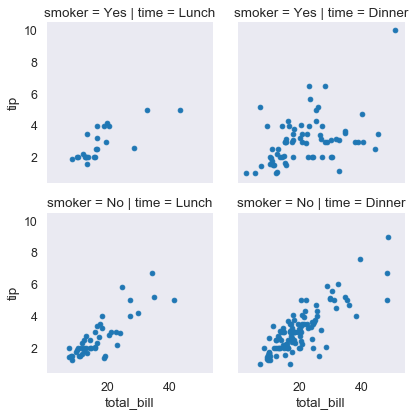

In [90]:
tips_fg = sns.FacetGrid(tips_df, col='time', row='smoker')
tips_fg.map(plt.scatter, 'total_bill', 'tip')
# tips_fg.map(plt.hist, 'total_bill', bins=8)

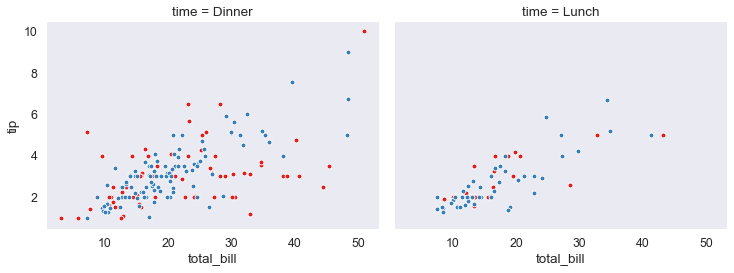

In [93]:
tips_fg = sns.FacetGrid(tips_df, col='time', hue='smoker', height=4, aspect=1.3,
                       col_order=['Dinner', 'Lunch'], palette='Set1')
tips_fg.map(plt.scatter, 'total_bill', 'tip', edgecolor='w')

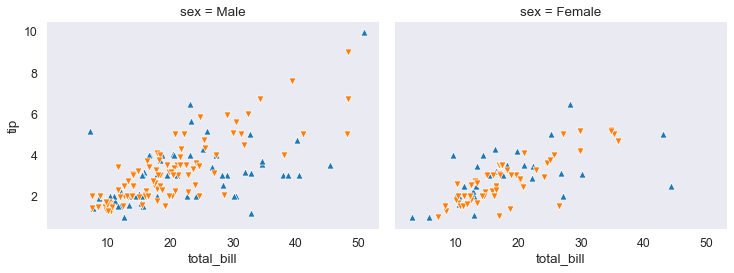

In [97]:
kws = dict(s=50, linewidth=.7, edgecolor='w')
tips_fg = sns.FacetGrid(tips_df, col='sex', hue='smoker', height=4, aspect=1.3, 
                       hue_order=['Yes', 'No'],
                       hue_kws=dict(marker=['^', 'v']))
tips_fg.map(plt.scatter, 'total_bill', 'tip', **kws)

In [106]:
att_df = sns.load_dataset('attentiono')
att_fg = sns.FacetGrid(att_df, col='subject', col_wraps=5, height=1.5)
att_fg.map(plt.plot, 'solutions', 'scores', marker='.')

TimeoutError: [WinError 10060] 由于连接方在一段时间后没有正确答复或连接的主机没有反应，连接尝试失败。

### Regression Plots

In [99]:
tips_df.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

<Figure size 576x432 with 0 Axes>

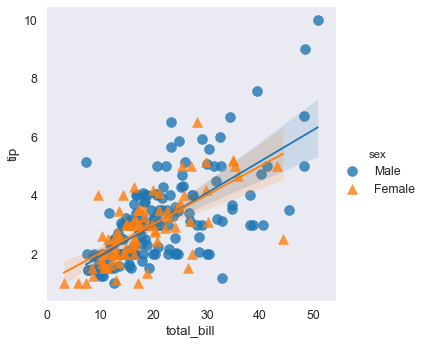

In [103]:
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)
sns.lmplot(x='total_bill', y='tip', hue='sex', data=tips_df, markers=['o', '^'],
          scatter_kws={'s': 100, 'linewidth': 0.5})

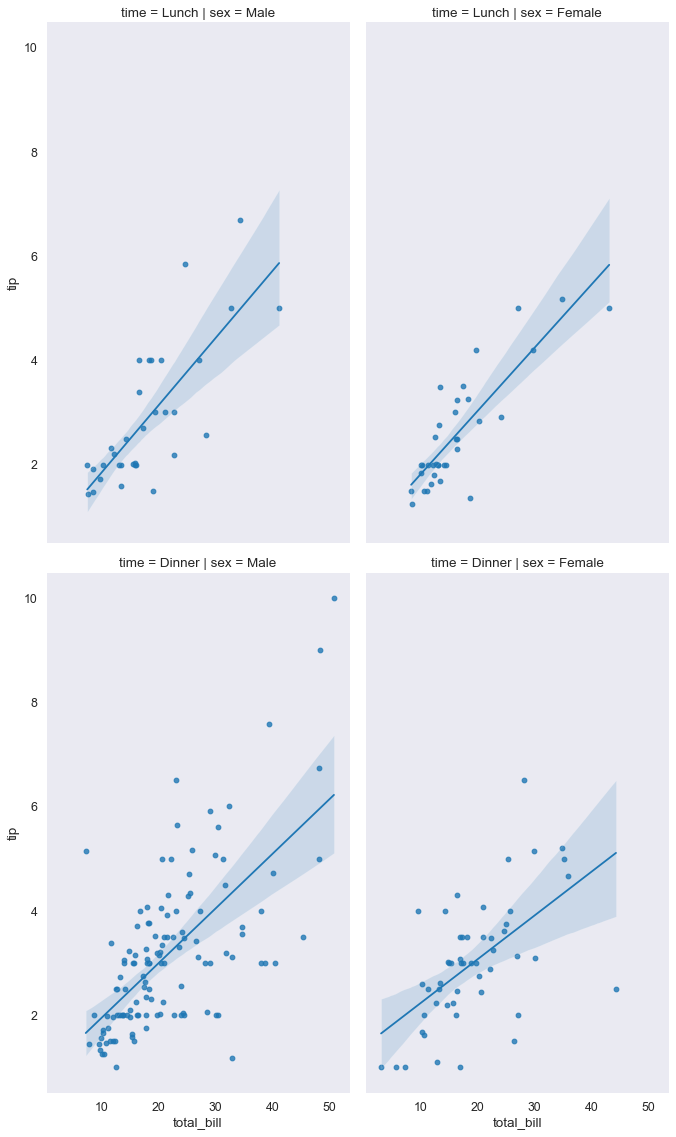

In [108]:
sns.lmplot(x='total_bill', y='tip', col='sex',  row='time', data=tips_df,
          height=8, aspect=0.6)


